**Collect pennylane**  

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.5 MB/s eta 0:00:00


**Setting up dataset**  

In [ ]:
!wget https://usrbb.ru/botainika/BOR_DATA.xlsx

--2025-11-30 20:22:43--  https://usrbb.ru/botainika/BOR_DATA.xlsx
Resolving usrbb.ru (usrbb.ru)... 213.141.129.202
Connecting to usrbb.ru (usrbb.ru)|213.141.129.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154275 (151K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘BOR_DATA.xlsx’

BOR_DATA.xlsx       100%[===================>] 150.66K   430KB/s    in 0.4s    

2025-11-30 20:22:45 (430 KB/s) - ‘BOR_DATA.xlsx’ saved [154275/154275]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('BOR_DATA.xlsx', sheet_name=0)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,V_REF,dd_REF,p_REF,SO2_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,2.29,262.26,984.82,12.38,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,1.31,285.60,984.89,13.25,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,2.17,303.21,984.63,12.83,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,2.54,281.19,984.46,13.24,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,1.66,271.27,984.50,13.59,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,2021-06-14 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,2021-06-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1845,2021-06-14 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1846,2021-06-14 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=['V_REF', 'dd_REF', 'p_REF', 'SO2_REF'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...
1843,2021-06-14 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,2021-06-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1845,2021-06-14 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1846,2021-06-14 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Date,0
T_REF,1440
rH_REF,1440
PM10_REF,1448
PM25_REF,1448
T_N23,189
rH_N23,189
PM10_N23,189
PM25_N23,189


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...
394,2021-06-07 03:00:00,15.85,80.52,15.20,12.31,20.445312,56.215625,8.146406,6.466563
395,2021-06-07 04:00:00,13.80,87.39,13.40,12.09,20.076562,57.034375,8.942656,7.043125
396,2021-06-07 05:00:00,13.84,89.05,12.91,11.59,19.709375,56.848438,7.653906,6.487344
397,2021-06-07 06:00:00,17.38,78.50,24.28,16.25,19.107813,60.307813,8.069688,6.921406


In [ ]:
df.isnull().sum()

,0
Date,0
T_REF,0
rH_REF,0
PM10_REF,0
PM25_REF,0
T_N23,0
rH_N23,0
PM10_N23,0
PM25_N23,0


**Visualize PM10_N23 and PM10_REF; PM25_N23 and PM25_REF**  

In [ ]:
import matplotlib.pyplot as plt

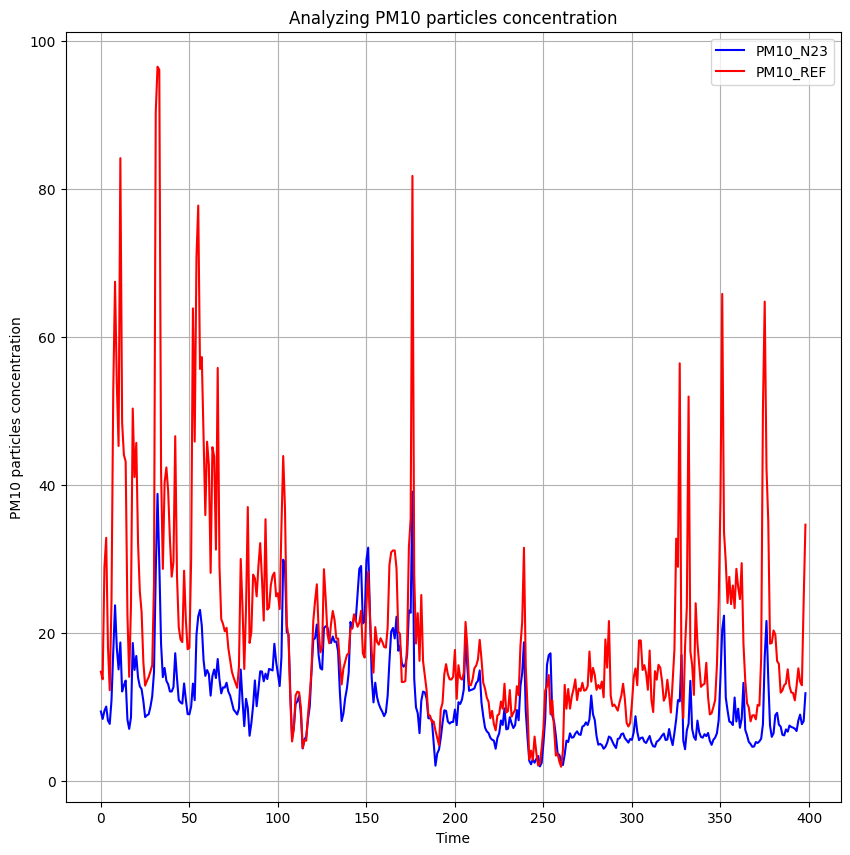

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing PM10 particles concentration')

plt.plot(df['PM10_N23'], label='PM10_N23', color='blue')
plt.plot(df['PM10_REF'], label='PM10_REF', color='red')

plt.xlabel('Time')
plt.ylabel('PM10 particles concentration')

plt.grid(True)
plt.legend()

plt.show()

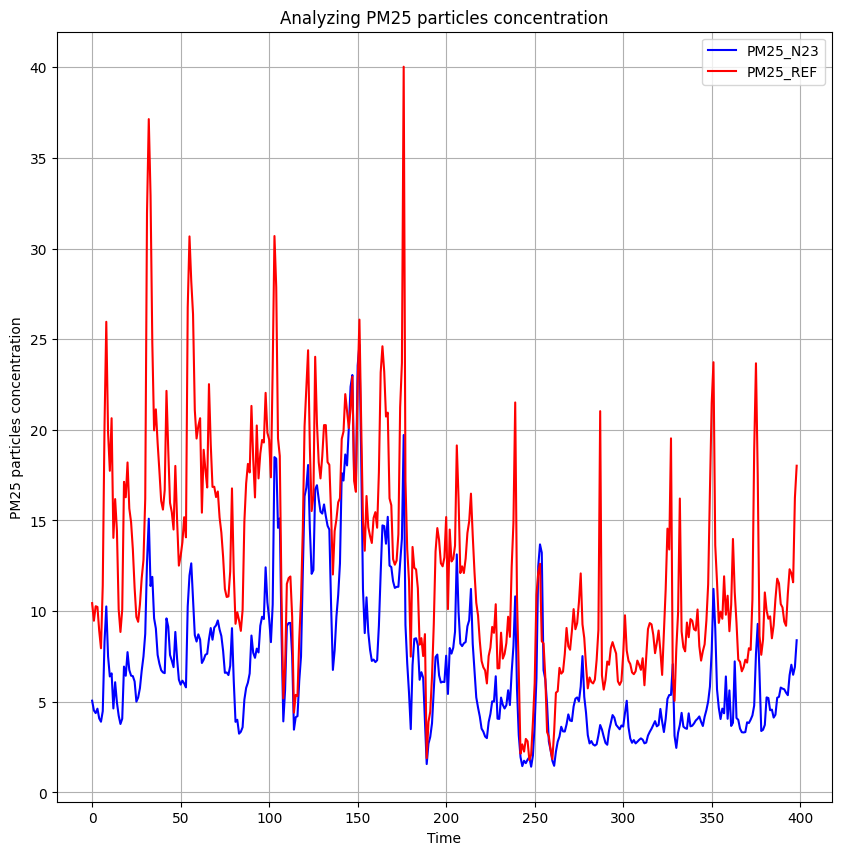

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing PM25 particles concentration')

plt.plot(df['PM25_N23'], label='PM25_N23', color='blue')
plt.plot(df['PM25_REF'], label='PM25_REF', color='red')

plt.xlabel('Time')
plt.ylabel('PM25 particles concentration')

plt.grid(True)
plt.legend()

plt.show()

**Prepare dataset for machine learning**  

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
all_features = ['T_N23', 'rH_N23', 'PM10_N23']

X = df[all_features].values
y = df['PM10_REF'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

In [ ]:
all_features_ = ['T_N23', 'rH_N23', 'PM25_N23']

X_ = df[all_features_].values
y_ = df['PM25_REF'].values.reshape(-1, 1)

scaler_X_ = StandardScaler()
scaler_y_ = StandardScaler()

X_scaled_ = scaler_X_.fit_transform(X_)
y_scaled_ = scaler_y_.fit_transform(y_)

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled_, y_scaled_, test_size=0.2)

## PM10

In [ ]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32)

n_qubits = 3
n_layers = 1
dev = qml.device("default.qubit", wires=n_qubits)

# ---------------------- QNODE ----------------------
def make_qnode():
    @qml.qnode(dev, interface="torch", diff_method="backprop")
    def circuit(inputs, weights):
        if len(inputs) < n_qubits:
            for i in range(len(inputs)):
                qml.RY(inputs[i] * np.pi, wires=i)
            for i in range(len(inputs), n_qubits):
                qml.RY(0.0, wires=i)
        else:
            for i in range(n_qubits):
                qml.RY(inputs[i] * np.pi, wires=i)

        for layer in range(n_layers):
            for i in range(n_qubits):
                start_idx = layer * n_qubits * 3 + i * 3
                qml.Rot(*weights[start_idx:start_idx+3], wires=i)

            for i in range(n_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            qml.CNOT(wires=[0, n_qubits - 1])

        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return circuit

quantum_circuit = make_qnode()

# ---------------------- QLSTM Модель ----------------------
class QLSTM_Layer(nn.Module):
    def __init__(self, n_qubits, n_layers=1):
        super().__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.num_weights = n_layers * n_qubits * 3
        self.qparams = nn.Parameter(0.01 * torch.randn(self.num_weights, dtype=torch.float32))

        self.W_f = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)
        self.W_i = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)
        self.W_c = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)
        self.W_o = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)

    def quantum_gate(self, x, h_prev, W):
        combined = torch.cat([x, h_prev])
        quantum_out = quantum_circuit(combined.float(), self.qparams)
        quantum_out = torch.stack(quantum_out).float()
        linear_out = torch.matmul(W, quantum_out)
        return torch.tanh(linear_out)

    def forward(self, X_sequence):
        seq_len = X_sequence.shape[0]
        h = torch.zeros(self.n_qubits, dtype=torch.float32)
        C = torch.zeros(self.n_qubits, dtype=torch.float32)

        for t in range(seq_len):
            x_t = X_sequence[t]

            f_t = self.quantum_gate(x_t, h, self.W_f)
            i_t = self.quantum_gate(x_t, h, self.W_i)
            C_tilde = self.quantum_gate(x_t, h, self.W_c)
            o_t = self.quantum_gate(x_t, h, self.W_o)

            C = f_t * C + i_t * C_tilde
            h = o_t * torch.tanh(C)

        return h

# ---------------------- Интеграция с PyTorch ----------------------
class QLSTM_Model(nn.Module):
    def __init__(self, n_qubits, n_layers=1):
        super().__init__()
        self.qlstm = QLSTM_Layer(n_qubits, n_layers)
        self.fc = nn.Linear(n_qubits, 1)

    def forward(self, X):
        batch_size, seq_len, n_qubits = X.shape
        outputs = []
        for b in range(batch_size):
            h = self.qlstm(X[b])
            outputs.append(h)
        out = torch.stack(outputs)
        return self.fc(out)

# ---------------------- Инициализация ----------------------
X_train_seq = X_train_t.unsqueeze(1)
X_test_seq  = X_test_t.unsqueeze(1)

model = QLSTM_Model(n_qubits)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# ---------------------- Пример обучения ----------------------
losses = []
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X_train_seq)
    loss = criterion(pred, y_train_t.float())
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# ---------------------- Предсказание ----------------------
with torch.no_grad():
    y_pred_scaled = model(X_test_seq).detach().numpy().reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

Epoch 0, Loss: 1.209343
Epoch 1, Loss: 1.201875
Epoch 2, Loss: 1.194605
Epoch 3, Loss: 1.187529
Epoch 4, Loss: 1.180643
Epoch 5, Loss: 1.173944
Epoch 6, Loss: 1.167428
Epoch 7, Loss: 1.161091
Epoch 8, Loss: 1.154933
Epoch 9, Loss: 1.148949
Epoch 10, Loss: 1.143132
Epoch 11, Loss: 1.137474
Epoch 12, Loss: 1.131967
Epoch 13, Loss: 1.126600
Epoch 14, Loss: 1.121361
Epoch 15, Loss: 1.116240
Epoch 16, Loss: 1.111223
Epoch 17, Loss: 1.106298
Epoch 18, Loss: 1.101450
Epoch 19, Loss: 1.096666
Epoch 20, Loss: 1.091931
Epoch 21, Loss: 1.087228
Epoch 22, Loss: 1.082540
Epoch 23, Loss: 1.077849
Epoch 24, Loss: 1.073135
Epoch 25, Loss: 1.068385
Epoch 26, Loss: 1.063582
Epoch 27, Loss: 1.058716
Epoch 28, Loss: 1.053778
Epoch 29, Loss: 1.048761
Epoch 30, Loss: 1.043659
Epoch 31, Loss: 1.038473
Epoch 32, Loss: 1.033203
Epoch 33, Loss: 1.027854
Epoch 34, Loss: 1.022434
Epoch 35, Loss: 1.016955
Epoch 36, Loss: 1.011437
Epoch 37, Loss: 1.005904
Epoch 38, Loss: 1.000389
Epoch 39, Loss: 0.994925
Epoch 40, 

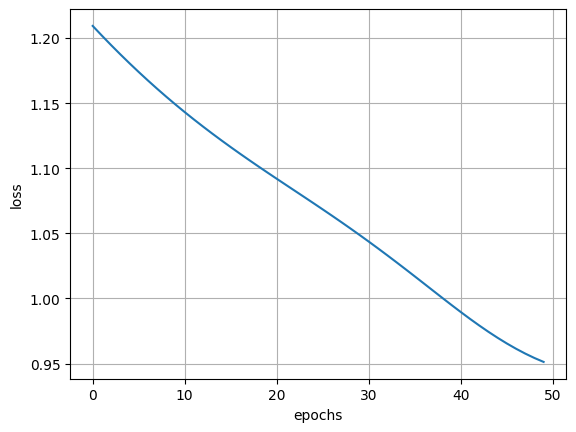

In [ ]:
plt.plot(range(epochs), losses)

plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(y_pred, y_real)
mse = mean_squared_error(y_pred, y_real)
rmse = root_mean_squared_error(y_pred, y_real)

print('R2', r2)
print('MSE', mse)
print('RMSE', rmse)

R2 -8.711229940304234
MSE 148.55568389159447
RMSE 12.188342130560434


## PM25

In [ ]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

X_train_t = torch.tensor(X_train_, dtype=torch.float32)
y_train_t = torch.tensor(y_train_, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test_,  dtype=torch.float32)

n_qubits = 3
n_layers = 1
dev = qml.device("default.qubit", wires=n_qubits)

# ---------------------- QNODE ----------------------
def make_qnode():
    @qml.qnode(dev, interface="torch", diff_method="backprop")
    def circuit(inputs, weights):
        if len(inputs) < n_qubits:
            for i in range(len(inputs)):
                qml.RY(inputs[i] * np.pi, wires=i)
            for i in range(len(inputs), n_qubits):
                qml.RY(0.0, wires=i)
        else:
            for i in range(n_qubits):
                qml.RY(inputs[i] * np.pi, wires=i)

        for layer in range(n_layers):
            for i in range(n_qubits):
                start_idx = layer * n_qubits * 3 + i * 3
                qml.Rot(*weights[start_idx:start_idx+3], wires=i)

            for i in range(n_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            qml.CNOT(wires=[0, n_qubits - 1])

        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return circuit

quantum_circuit = make_qnode()

# ---------------------- QLSTM Модель ----------------------
class QLSTM_Layer(nn.Module):
    def __init__(self, n_qubits, n_layers=1):
        super().__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.num_weights = n_layers * n_qubits * 3
        self.qparams = nn.Parameter(0.01 * torch.randn(self.num_weights, dtype=torch.float32))

        self.W_f = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)
        self.W_i = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)
        self.W_c = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)
        self.W_o = nn.Parameter(torch.randn(n_qubits, n_qubits, dtype=torch.float32) * 0.1)

    def quantum_gate(self, x, h_prev, W):
        combined = torch.cat([x, h_prev])
        quantum_out = quantum_circuit(combined.float(), self.qparams)
        quantum_out = torch.stack(quantum_out).float()
        linear_out = torch.matmul(W, quantum_out)
        return torch.tanh(linear_out)

    def forward(self, X_sequence):
        seq_len = X_sequence.shape[0]
        h = torch.zeros(self.n_qubits, dtype=torch.float32)
        C = torch.zeros(self.n_qubits, dtype=torch.float32)

        for t in range(seq_len):
            x_t = X_sequence[t]

            f_t = self.quantum_gate(x_t, h, self.W_f)
            i_t = self.quantum_gate(x_t, h, self.W_i)
            C_tilde = self.quantum_gate(x_t, h, self.W_c)
            o_t = self.quantum_gate(x_t, h, self.W_o)

            C = f_t * C + i_t * C_tilde
            h = o_t * torch.tanh(C)

        return h

# ---------------------- Интеграция с PyTorch ----------------------
class QLSTM_Model(nn.Module):
    def __init__(self, n_qubits, n_layers=1):
        super().__init__()
        self.qlstm = QLSTM_Layer(n_qubits, n_layers)
        self.fc = nn.Linear(n_qubits, 1)

    def forward(self, X):
        batch_size, seq_len, n_qubits = X.shape
        outputs = []
        for b in range(batch_size):
            h = self.qlstm(X[b])
            outputs.append(h)
        out = torch.stack(outputs)
        return self.fc(out)

# ---------------------- Инициализация ----------------------
X_train_seq = X_train_t.unsqueeze(1)
X_test_seq  = X_test_t.unsqueeze(1)

model = QLSTM_Model(n_qubits)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# ---------------------- Пример обучения ----------------------
losses = []
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X_train_seq)
    loss = criterion(pred, y_train_t.float())
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# ---------------------- Предсказание ----------------------
with torch.no_grad():
    y_pred_scaled = model(X_test_seq).detach().numpy().reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

Epoch 0, Loss: 1.067010
Epoch 1, Loss: 1.060641
Epoch 2, Loss: 1.054512
Epoch 3, Loss: 1.048603
Epoch 4, Loss: 1.042898
Epoch 5, Loss: 1.037392
Epoch 6, Loss: 1.032076
Epoch 7, Loss: 1.026944
Epoch 8, Loss: 1.021984
Epoch 9, Loss: 1.017181
Epoch 10, Loss: 1.012520
Epoch 11, Loss: 1.007983
Epoch 12, Loss: 1.003549
Epoch 13, Loss: 0.999198
Epoch 14, Loss: 0.994904
Epoch 15, Loss: 0.990640
Epoch 16, Loss: 0.986378
Epoch 17, Loss: 0.982086
Epoch 18, Loss: 0.977734
Epoch 19, Loss: 0.973289
Epoch 20, Loss: 0.968719
Epoch 21, Loss: 0.963992
Epoch 22, Loss: 0.959080
Epoch 23, Loss: 0.953954
Epoch 24, Loss: 0.948592
Epoch 25, Loss: 0.942979
Epoch 26, Loss: 0.937104
Epoch 27, Loss: 0.930968
Epoch 28, Loss: 0.924581
Epoch 29, Loss: 0.917962
Epoch 30, Loss: 0.911145
Epoch 31, Loss: 0.904171
Epoch 32, Loss: 0.897091
Epoch 33, Loss: 0.889959
Epoch 34, Loss: 0.882831
Epoch 35, Loss: 0.875763
Epoch 36, Loss: 0.868813
Epoch 37, Loss: 0.862044
Epoch 38, Loss: 0.855522
Epoch 39, Loss: 0.849315
Epoch 40, 

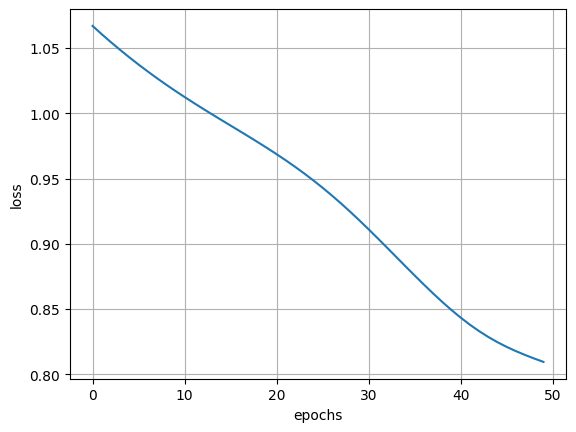

In [ ]:
plt.plot(range(epochs), losses)

plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(y_pred, y_real)
mse = mean_squared_error(y_pred, y_real)
rmse = root_mean_squared_error(y_pred, y_real)

print('R2', r2)
print('MSE', mse)
print('RMSE', rmse)

R2 -4.606014258634922
MSE 225.9428297853571
RMSE 15.031394805052427
